This lab session in an introduction to feed-forward neural network with pytorch. We use the dataset Fashion-MNIST (see for more details this website https://github.com/zalandoresearch/fashion-mnist). The dataset contains 60000 and 10000 images for respectively training and testing. Each image is 28x28 pixels, for a total of 784 per image.  An image is presented to the neural network as a flat vector of 784 component. 


In this lab session, you will experiment different kind of feed-forward networks, starting with simple models,  and then increasing their complexity. 

First load and test python and pytorch. Your notebook is supposed to work with python 3 (see the top right corner of the notebook).


# Initialization of session  

## Mounting the drive

First we need to import the dataset. We first connect the current environment to the Drive. You may change this lign so that the programm works properly.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing modules

We first import several modules such as numpy and matplotlib, which offer the possibility to visualize our images. 

Then, we want to import torch, which allows to manipulate neurol network easily using python.

In [3]:

# math, numpy and plot
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'


# torch 
import torch as th
import torch.nn as nn
print(th.__version__) # should be greater or equal to 1.0
# gzip 
import gzip
import pickle



1.11.0+cu113


# Dataset

To simplify, just download and / or read the picke file provided. 


In [4]:
# Load the dataset
import gzip
fp = gzip.open('/content/drive/MyDrive/ColabNotebooks/fashion-mnist.pk.gz','rb')
allXtrain, allYtrain, Xtest, Ytest, classlist  = pickle.load(fp) 

**Important**: The dataset is split in two parts, the training set and the test set.
For thorough study and evaluation of machine learning models, a good practice is to consider the data in 3 parts: 
- the **training** set to learn the model parameters;
- the **validation** set to tune the hyper parameters and some design choices (the number and the size of the hidden layers, the dropout probability, ...);
- the **test** set to evaluate the model at the end. 


For the moment, we leave the test set and focus on the training set. 
To spare time, we will only consider the first 20000 images for training in the following set of experiments. And we also build a validation set to compare the results we obtain with different hyper-parameters. 


This is why we select some images among all available images.

In [5]:
Xtrain, Ytrain  = allXtrain[:20000], allYtrain[:20000]
Xvalid, Yvalid  = allXtrain[20000:30000], allYtrain[20000:30000]
print("Training   shape:" ,Xtrain.shape)
print("Validation shape:" ,Xvalid.shape)
print("Validation class shape", Yvalid.shape)

Training   shape: torch.Size([20000, 784])
Validation shape: torch.Size([10000, 784])
Validation class shape torch.Size([10000])


To better understand the dataset explore the training set made of Xtrain and Ytrain. 
- Look at the dimension and type of the tensors
- Print also the classlist variable. 
- Then look at some example to check consistency. 

For that purpose you can plot an image like this: 

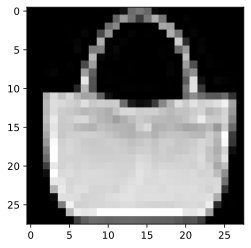

In [ ]:
plt.imshow(Xtrain[100].numpy().reshape(28,28) , matplotlib.pyplot.cm.gray)#On peut changer l'image que l'on affiche en modifiant l'indice de Xtrain



As a first overview of the dataset, we can do a PCA (in 2D) of the training set. The following image represents the result: 

<img src="https://allauzen.github.io/assets/figs/pca-fashion-10-classes.png" 
    style="width:400px; margin:0px auto;display:block">



# Feed forward neural network



A feedforward model can rely on the pytorch module *Sequential*. 
A *Sequential* module is a container of ordered modules: the first one takes input data and its output is given to feed the second module, and so on. 

**Note: ** In pytorch, modules assumed Tensors as input. The input Tensor can contain just one input (online mode) or several inputs (mini-batch). The first dimension of the input Tensor corresponds to the mini-batch, and the second one to the dimension of the example to feed in. For example, with a mini-batch of size B and an image of D pixels, the input Tensor should be of shape (B,D), even if B=1 for one exemple. 


## Shallow network

Let start with a simple model with one input layer and one output layer (without hidden layers). Please refer to the examples provided previously, and propose an implementation of this linear model using the *Sequential* module as container.  To write the model, we must consider the fact that the model is trained in order to maximize the Log-likelihood on the training data. If you look at  https://pytorch.org/docs/stable/nn.html, the documentation of the NNet package of pytorch, there is a section on the loss functions. 

Two of the proposed loss function can be used for our purpose. The choice of one of them implies the choice of the activation function at the output layer. 

- If we choose NLLLoss(), we have to choose the LogSoftmax() activation.
- 

*By the Way*
If we choose BCELoss() (binary problem, not our case), we have to choose the sigmoid() activation, to have probabilities.

For the rest of the session, we choose the NLLLoss() function.


In [ ]:
D_in = 784
D_out= 10
model = th.nn.Sequential(th.nn.Linear(D_in, D_out),  #Random Matrix that takes a 784-D vector, and turn it into a 10-D vector.
                         th.nn.LogSoftmax(dim=1)) #M
# Softmax pour ne pas être en binaire, mais plusieurs probas (distribution sur plusierus classes). On veut normaliser pour faire des probas, c'est la valeur de l'argument de sortie qu'il faut normaliser (les 10 classes d'objets)
#Lorsque l'on a affaire à des problèmes binaires, on peut utilise Sigmoid
loss_function = th.nn.NLLLoss() #MSE : Les moindres carrés, on regarde les sommes des valeurs au carré.




Then, we test the code on a minibatch of B examples. The code below corresponds to a prediction on a single image and then on 3 images. Look at the results, their shapes and values. Is it consistent with what you expect ? 

In [ ]:
B=1
i = 0
pred = model(Xtrain[i:i+B])

# explore 
print(pred)
print(Ytrain[i:i+B])
#Le tenseur pred est de taille 10 en accord avec la valeur de D_out.
#En sortie, on a un tenseur exprimé en log. Il nous informe qu'il n'ya qu'une seule coordonnée
#du tenseur pour laquelle on a une probabilité de 1, les autres probabilités étant très faibles. 
#
B=3 #sur 3 images
i = 0
pred = model(Xtrain[i:i+B])
print(pred)
print(Ytrain[i:i+B])

tensor([[ -30.9501,  -18.2895,  -37.7091, -241.9758,  -24.7468, -155.0351,
            0.0000,  -94.3812,  -53.3535,  -40.4168]],
       grad_fn=<LogSoftmaxBackward0>)
tensor([9])
tensor([[-3.0950e+01, -1.8290e+01, -3.7709e+01, -2.4198e+02, -2.4747e+01,
         -1.5504e+02,  0.0000e+00, -9.4381e+01, -5.3354e+01, -4.0417e+01],
        [-1.9094e+02, -5.4237e+01, -6.3220e+01, -2.6524e+01, -9.0176e+01,
         -2.3273e+02, -6.9127e+01,  0.0000e+00, -5.2351e+01, -4.4233e+01],
        [-5.1603e+01, -3.3497e+01, -1.7709e+01, -1.7199e+01, -8.7279e+00,
         -8.2905e+01, -1.9549e+01, -9.2344e+00, -2.5960e-04, -4.4565e+01]],
       grad_fn=<LogSoftmaxBackward0>)
tensor([9, 0, 0])


*Regarding the output*
- We have a 10-D tensor for one image with negative values, which is logical according to the Logsoftmax documentation https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax. 
- However, the prediction is completely false for the moment, since we didn't train our model. Indeed, the highest value's index in the list "pred" should correspond to the type of the image. This is not necesseraly the case. 

We can do the same with the loss function. 

tensor(190.9440, grad_fn=<NllLossBackward0>)
tensor(98.7793, grad_fn=<NllLossBackward0>)


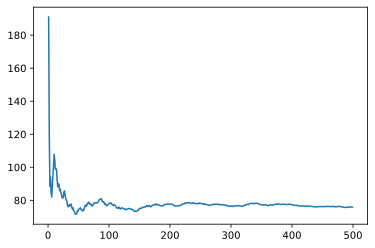

In [ ]:
B=1
i = 1
np.shape(Xtrain[i:i+B])
pred = model(Xtrain[i:i+B])
loss = loss_function(pred, Ytrain[i:i+B])
print(loss)
# explore 
B=12
i = 1
pred = model(Xtrain[i:i+B])
loss = loss_function(pred, Ytrain[i:i+B])
print(loss)

loss_list =[]
for B in range (500):
  pred = model(Xtrain[i:i+B])
  loss = loss_function(pred, Ytrain[i:i+B])
  loss_list.append(loss.detach().numpy())
plt.plot(loss_list)
plt.show()

We find positive numbers that doesn't seem to follow a certain logic when increasing $B$. We can only say that it seems to be constant when $B$ becomes quite high ($B>200$)

## Online learning  and mini-batch

We will start by writing the code for training a model. The code should be as generic as possible to handle different kind of model. Afterwards, you will wrap your code in a function. 

We will use the Adam optimizer with an initial learning rate of 0.001.  

The following cell contains examples of code that can be useful to train the model:  
- Init. of the model and the optimizer.  
- Ideas the iterate over the dataset in a random order
- Mini-batch processing 
- Forward and backward pass

In [ ]:
### The model, the loss and optimizer
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.NLLLoss()

### Mini-batching and shuffle 
Ntrain = Xtrain.shape[0] 
Nvalid = Xvalid.shape[0]
print('Ntrain:', Ntrain, 'Nvalid:',Nvalid)
idx = np.arange(Ntrain) # Generate the indices 
batch_size = 200
nbatch = int(Ntrain/batch_size) # the number of batches
print(batch_size, nbatch)

np.random.shuffle(idx) # random order of indices 
bi = 2 # a random choice
ids = idx[bi*batch_size:(bi+1)*batch_size] # Get indices
images = Xtrain[ids]  # Get the images
labels = Ytrain[ids]  # The Labels
optimizer.zero_grad()
logprobs=model(images) # inference 
loss=loss_fn(logprobs,labels) # compute the loss
print("Loss function: ",loss)     
loss.backward() # Back propagation
optimizer.step() # update the parameters
# Note: just for illustration and checking, we can recompute 
# the loss on the same minibatch, but after the update. 
logprobs=model(images) # inference 
loss=loss_fn(logprobs,labels) # compute the loss
print("Loss function: ",loss.item()) # better print ! 


Ntrain: 20000 Nvalid: 10000
200 100
Loss function:  tensor(69.8067, grad_fn=<NllLossBackward0>)
Loss function:  56.4453010559082


Given the previous example, we can write the "full" training: 
- Init. of everything useful
- The training loop, 
- The definition of values to follow if the model is train properly

Remember that we need the values of the loss function both on the train and on the validation set. 

In [ ]:
    
### The model, the loss and optimizer
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.NLLLoss()

Nepochs=30 # Size of the loop. The higher it is, the best we learn (beware of overfitting)

Ntrain = Xtrain.shape[0] 
Nvalid = Xvalid.shape[0]
print('Ntrain:', Ntrain, 'Nvalid:',Nvalid)
idx = np.arange(Ntrain) # Generate the indices 
idxvalid = np.arange(Nvalid)
np.random.shuffle(idx) # On met les images dans un ordre aléatoire
batch_size = 200
nbatch = int(Ntrain/batch_size) # the number of batches
print(batch_size, nbatch)

train_losses=[]
valid_losses=[]
valid_accuracies=[]

for i in range (Nepochs): 
  running_loss=0
  for j in range (nbatch):
    bi=j
    ids = idx[bi*batch_size:(bi+1)*batch_size] # Get indices
    images = Xtrain[ids]  # Get the images
    labels = Ytrain[ids]  # The Labels  
    optimizer.zero_grad()
    logprobs=model(images) # inference 
    loss=loss_fn(logprobs,labels) # compute the loss
    loss.backward() # Back propagation
    optimizer.step() # update the parameters
    running_loss+=loss.item()
  train_losses.append(running_loss/nbatch)
  with  th.no_grad():
    model.eval()
    images = Xvalid[idxvalid]  # Get the images
    labels = Yvalid[idxvalid]  # The Labels  
    logprobs=model(images) # inference 
    valid_loss=loss_fn(logprobs,labels) # compute the loss
    top_p, top_class = logprobs.topk(1)
    accuracy= (top_class.T == labels).sum().float()
    model.train()
  optimizer.zero_grad()
  valid_losses.append(valid_loss/Nvalid)
  valid_accuracies.append(accuracy /Nvalid*nbatchtrain)


print("Loss function: ",loss) 


Run the training loop with a batch size of 1 and then of size 200. The difference in terms of computation time should be significant ! We will now only use a batch size of 200. 

Note that in practice, the learning rate should be adapted to the mini-batch size. 

Run the previous training code with a batch size of 200 for 30 epochs. We can plot at the results like this


(0.0, 82.78150177001953)

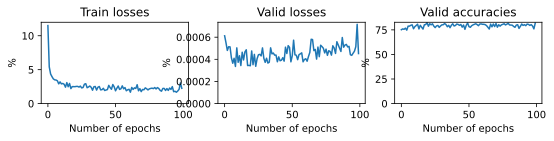

In [ ]:
plt.figure(figsize = (9, 1.5))
ax= plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Train losses')
plt.xlabel('Number of epochs')
plt.ylabel('%')
ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 2)
plt.plot(valid_losses)
plt.title('Valid losses')
plt.xlabel('Number of epochs')
plt.ylabel('%')
ax.set_ylim(bottom=0)
ax= plt.subplot(1, 3, 3)
plt.plot(valid_accuracies)
plt.title('Valid accuracies')
plt.xlabel('Number of epochs')
plt.ylabel('%')
ax.set_ylim(bottom=0)#On peut commenter cette ligne si on veut voir plus précisément les variations locales autour de 75%

*Answer*

We observe that the loss is decreasing and the accuracies is limited to approximately 75%.

## Training wrapper 

Write a function that wraps what we need to train a model and look at the results. 

**Answer ** 
We wrote 2 functions, one function that train the model, and the other to plot the result.

Good to notice : the call of  *model(X)* return a 2D tensor. The 2D tensor has a line for every image of the batch. The line of an image has one column per label (here 10). The tensor contains the log-probabilities that the image corresponds to the label of the column.


In [6]:


def train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs=30,verbose=False):
  #Initialisation des variable
  Ntrain = Xtrain.shape[0] 
  Nvalid = Xvalid.shape[0]
  batch_size = 200
  idx = np.arange(Ntrain) # Generate the indices 
  idxvalid = np.arange(Nvalid)
  nbatch = int(Ntrain/batch_size) # the number of batches
  #Initialisation des résultats
  train_losses=[]
  valid_losses=[]
  valid_accuracies=[]
  for i in range(epochs):
    np.random.shuffle(idx) # random order of indices 
    running_loss=0
    for j in range(nbatch):
      bi=j
      ids = idx[bi*batch_size:(bi+1)*batch_size] # Get indices
      images = Xtrain[ids]  # Get the images
      labels = Ytrain[ids]  # The Labels  
      optimizer.zero_grad()
      logprobs=model(images) # inference 
      loss=loss_fn(logprobs,labels) # compute the loss
      loss.backward() # Back propagation
      optimizer.step() # update the parameters
      running_loss+=loss.item()
    train_losses.append(running_loss/nbatch)
    accuracy=0
    valid_loss=0
    with  th.no_grad():
      model.eval()
      images = Xvalid[idxvalid]  # Get the images
      labels = Yvalid[idxvalid]  # The Labels  
      logprobs=model(images) # inference 
      valid_loss=loss_fn(logprobs,labels) # compute the loss
      top_p, top_class = logprobs.topk(1)
      accuracy= (top_class.T == labels).sum().float()
      model.train()
    valid_losses.append(valid_loss)
    valid_accuracies.append(accuracy /Nvalid*nbatch)
  return max(valid_accuracies), train_losses, valid_losses, valid_accuracies

def graphe_classif(train_losses, valid_losses, valid_accuracies):
  plt.figure(figsize = (12, 1.5))
  plt.subplots_adjust(wspace=0.5)

  ax= plt.subplot(1, 3, 1)
  plt.plot(train_losses)
  plt.title('Train losses')
  plt.xlabel('Number of epochs')
  plt.ylabel('%')
  ax.set_ylim(bottom=0)

  ax= plt.subplot(1, 3, 2)
  plt.plot(valid_losses)
  plt.title('Valid losses')
  plt.xlabel('Number of epochs')
  plt.ylabel('%')
  ax.set_ylim(bottom=0)

  ax= plt.subplot(1, 3, 3)
  plt.plot(valid_accuracies)
  plt.title('Valid accuracies')
  plt.xlabel('Number of epochs')
  plt.ylabel('%')
  plt.ylim((0,100))
  return True


True

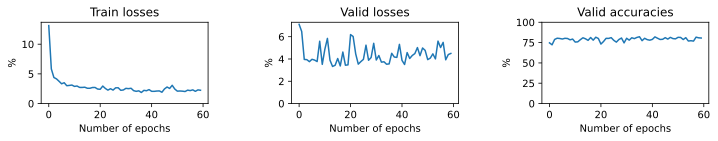

In [9]:

# When we create the model, its parameters are initialized. 
D_in = 784
D_out= 10
### The model, the loss and optimizer
model=nn.Sequential(nn.Linear(D_in,D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.NLLLoss()
# Note this important to build a new optimizer 
# if we want to have the reference to parameters 
# of the new model ! 
mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 60)
graphe_classif(tl,vl,va)

# Neural Network with one hidden layer

Now we have a function to train and evaluate the training process of a neural model, we can explore different configurations. Let start with a neural network with one hidden layer and a Sigmoid activation function on this hidden layer. We set the size of this hidden layer to 50. 

Write the model using the Sequential module, and train it: 
- for 30 epochs and with lr=0.001 and lr=0.0001
- do the same and raise the number of epoch to 50
What do you observe ? 

True

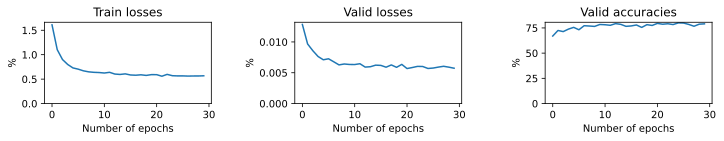

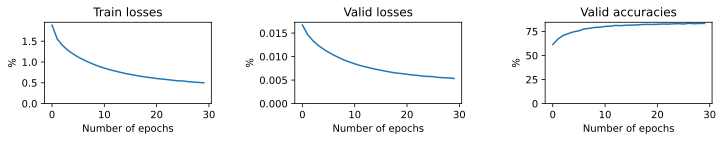

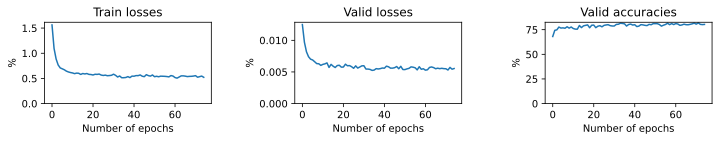

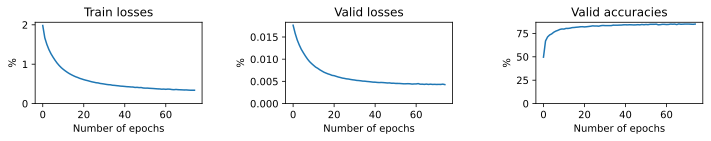

In [ ]:
## TODO 
hidden_layer = 50 

#lr 0.001, epochs = 30

print('lr= 0.001, epochs = 30')
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)

mva, tl, vl, va  = train(model,  Xtrain, Xvalid, Ytrain, Yvalid, epochs = 30)

graphe_classif(tl,vl,va)

#lr 0.0001, epochs = 30

print('lr= 0.0001, epochs = 30')
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va  = train(model,  Xtrain, Xvalid, Ytrain, Yvalid, epochs = 30)

graphe_classif(tl,vl,va)

#lr 0.001, epochs = 75

print('lr= 0.001, epochs = 75')
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.001)

mva, tl, vl, va  = train(model,  Xtrain, Xvalid, Ytrain, Yvalid, epochs = 75)


graphe_classif(tl,vl,va)
#lr 0.0001, epochs = 75

print('lr= 0.0001, epochs = 75')
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.Sigmoid(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va  = train(model,  Xtrain, Xvalid, Ytrain, Yvalid, epochs = 75)

graphe_classif(tl,vl,va)

**Answer**
- We observe that a lower learning rate produce a much smoother curve.
- However, we learn slower with higher learning rate.  
- Of course, a bigger number of epochs tends to train better our model, and we have a much clearer asysmptote.

### From Sigmoid to ReLU

Consider lr=0.0001 and train a similar model with a ReLU activation. Compare the results. 

True

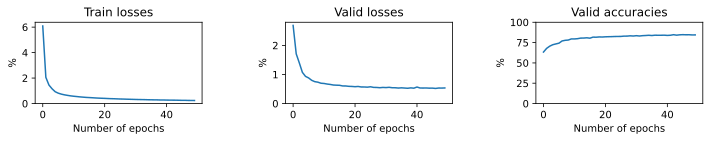

In [ ]:
hidden_layer = 50 
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 50)
graphe_classif(tl,vl,va)

*Answer*

-We observe a slightly faster learning using the ReLU. For the same learning rate, we needed about 25 epochs with the sigmoid and less than 10 with ReLU.
-The Accuracy stays pretty much the same.


---



### Impact of the hidden layer size

Run experiments with different hidden layer size, respectively : 50,100,150, 200 and 250. 
What do you observe ? 


50
100
150
200
250


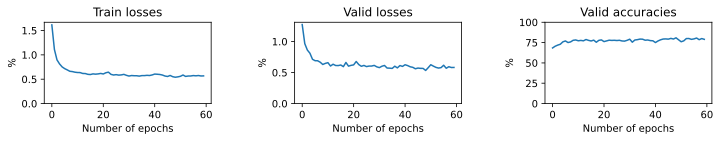

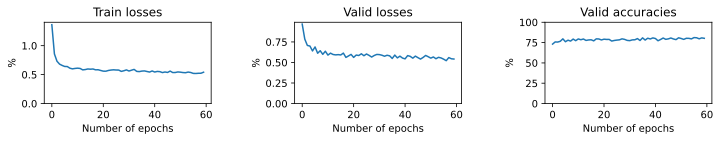

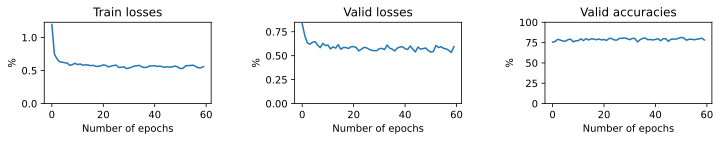

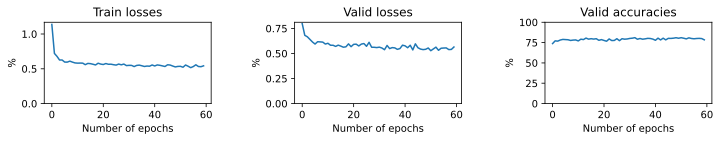

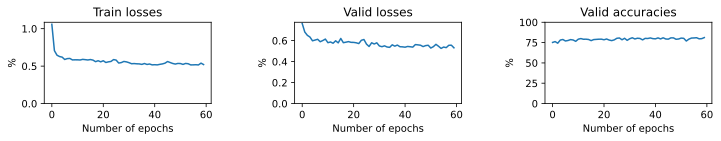

In [ ]:
hidden_layer_list =[50,100, 150, 200, 250]
for hl in hidden_layer_list:
  print(hl)
  model=nn.Sequential(nn.Linear(D_in, hl),
                    nn.Sigmoid(),
                    nn.Linear(hl, D_out),
                    nn.LogSoftmax(dim=1))
  
  optimizer=th.optim.Adam(model.parameters(),lr=0.001) 
  mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 60)
  graphe_classif(tl,vl,va)

*Answer* We have the same kind of observations. If we increase the hidden_layer size, we train our model faster.

The asymptote values doesn't seem to change with this size.

# Deeper network

Now we add one more hidden layer and consider a NNet with two hidden layers. 
The first setup is: 
- two hidden layers of size 50 with a ReLU activation
- a learning rate of 0.0001

Train it during 100 epochs 

tensor(86.7500)


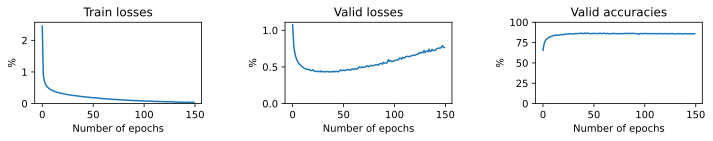

In [10]:
hidden_layer = 50 
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 150)
graphe_classif(tl,vl,va)
print(mva)

*Answer* 
We clearly observe overfitting on the second graphic. We train so much on the original datas that we are again increasing the Loss for the validation Dataset, with slightly different image. This is something we want to avoid because we will loose in precision doing so.


## Dropout 

You should observe overfitting, one solution is to add a dropout layer to the model (with a probability of 0.2 for example). Code this modification and rerun the training process to observe the impact. When you use a Dropout layer, the layer acts differently in the train mode and evaluation mode. You should take this into account when you train the model end when you compute the performance on the validation set. 



tensor(86.9300)


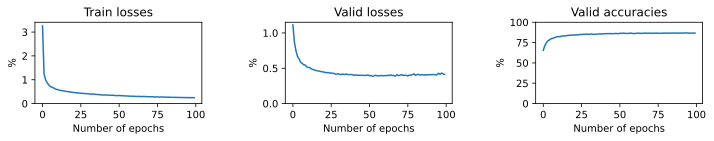

In [ ]:
hidden_layer = 50 
model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layer, hidden_layer),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 100)
graphe_classif(tl,vl,va)
print(mva)

Try different value of dropout to assess its impact on the training process. For example 0.3 and 0.5. 

tensor(86.9200)
tensor(86.5600)
tensor(84.7900)
tensor(81.8000)


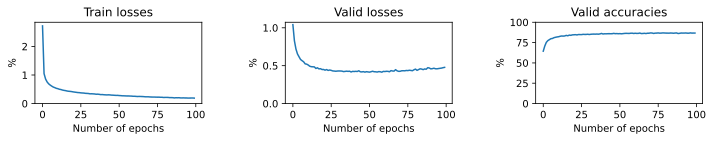

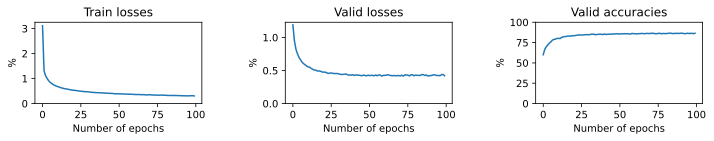

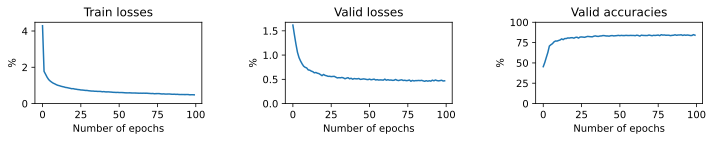

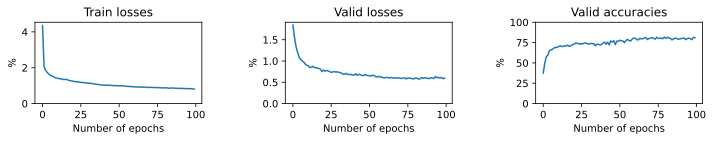

In [ ]:
liste_p = [0.1, 0.3, 0.5, 0.7]

for prob in liste_p:
  hidden_layer = 50 
  print(prob)
  model=nn.Sequential(nn.Linear(D_in, hidden_layer),
                      nn.ReLU(),
                      nn.Dropout(p=prob),
                      nn.Linear(hidden_layer, hidden_layer),
                      nn.ReLU(),
                      nn.Linear(hidden_layer, D_out),
                      nn.LogSoftmax(dim=1))
  optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

  mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 100)
  graphe_classif(tl,vl,va)
  print(mva)

*Answer*

For $p = 0,1$, we still observe overfitting (increase at the end of the second graph). 

Beyond $p= 0,2$, there is no overfitting anymore but if $p$ becomes higher, you need more time to train the network, because fewer neuron are activated at each period.

Then you can play with different  "hyper-parameters":
- Increase the size (double for example) of the first hidden layer
- Add a third hidden layer. 

*Answer*

We proposed the next model, which gave us a rather good accuracy.

tensor(88.3200)


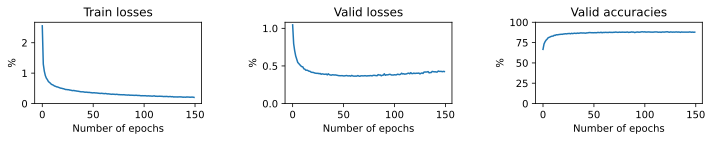

In [ ]:
hidden_layer1 = 150
hidden_layer2 = 100
hidden_layer3 = 50
model=nn.Sequential(nn.Linear(D_in, hidden_layer1),
                    nn.ReLU(),
                    nn.Dropout(p=0.4),
                    nn.Linear(hidden_layer1, hidden_layer2),
                    nn.ReLU(),
                    nn.Dropout(p=0.4),
                    nn.Linear(hidden_layer2, hidden_layer3),
                    nn.ReLU(),
                    nn.Linear(hidden_layer, D_out),
                    nn.LogSoftmax(dim=1))
optimizer=th.optim.Adam(model.parameters(),lr=0.0001)

mva, tl, vl, va = train(model, Xtrain, Xvalid, Ytrain, Yvalid, epochs = 150)
graphe_classif(tl,vl,va)
print(mva)

# Confusion matrix

For a good model you obtained, compute the confusion matrix and look at it. 


In [ ]:
from sklearn.metrics import confusion_matrix

Ymodel = model(Xvalid).detach().numpy()
Ypred =[]
for y in Ymodel:
  i = np.where(y == max(y))
  Ypred.append(int(i[0]))
#Ypred = np.where(np.any(Ymodel) == max(np.any(Ymodel)))
Ypred = th.tensor(Ypred)
confmat = confusion_matrix(Ypred, Yvalid)
print(confmat)

torch.Size([10000])
torch.Size([10000])
[[794   3   5  38   4   2 113   0   5   0]
 [  2 962   3   9   2   0   0   0   0   1]
 [ 25   4 801  19  96   0 109   0  15   0]
 [ 34  16  10 861  25   0  29   0   2   0]
 [  4   3 129  43 794   1 108   0   5   0]
 [  0   0   0   0   0 955   0  26   5  12]
 [141   1  54  32  68   0 641   0  13   0]
 [  0   0   0   0   0  42   0 943   7  47]
 [ 10   1   5   4   4   7  13   2 948   1]
 [  0   0   0   0   0  13   0  47   1 881]]


The biggest values are on the diagonal line, which is great. It means indeed that the predicted class for the object corresponds most of time to the actual class. 

# PCA 

To analyse the results, beyond the confusion matrix, we can compute the PCA (in 2D) and plot the projected datapoints depending on their classes, for instance by considering every pairs of classes. To compute the PCA and project the data, we can use the implementation provided by sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

[]

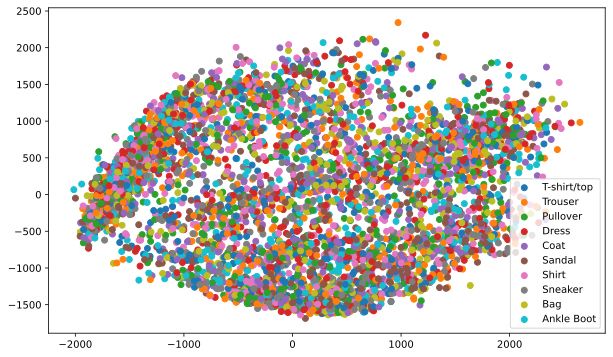

In [20]:
from sklearn.decomposition import PCA
from matplotlib import cm, colors

N_image = 5000 #We select some images to save time and get a clearer figure.

pca = PCA(n_components=2)
PCA_matrix = pca.fit_transform(Xtrain[:N_image])

cloths = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

fig, ax = plt.subplots(figsize=(10,6))
for i in range(N_image): 
  val = Ytrain[i] #class
  plot = plt.scatter(PCA_matrix[i,0], PCA_matrix[i,1], label = cloths[val] )


plt.legend(labels = classes)
plt.plot() 


We observe several domains overlapping each other :
- The fact that we actually visualize domains shows that the different categories are represented by different vectors, appearing at different positions in the plot.
- The fact that this domains overlap means that a 2D PCA isn't enough to fully classify our objects, and that we don't distinguish all objects anyway.

# Test 
- Take two best models (with one and two hidden layers) and run the evaluation on the test set. 
- Do the same with all the training data
